<a href="https://colab.research.google.com/github/Alireza-Kavoosi/GeneticAlgorithm/blob/main/pyomo-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install coinor-libipopt-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libipopt1v5 libmumps-5.4 libmumps-dev libmumps-headers-dev libmumps-seq-5.4
  libmumps-seq-dev libscalapack-mpi-dev libscalapack-openmpi-dev libscalapack-openmpi2.1
  libscotch-6.1
Suggested packages:
  scalapack-doc
The following NEW packages will be installed:
  coinor-libipopt-dev coinor-libipopt1v5 libmumps-5.4 libmumps-dev libmumps-headers-dev
  libmumps-seq-5.4 libmumps-seq-dev libscalapack-mpi-dev libscalapack-openmpi-dev
  libscalapack-openmpi2.1 libscotch-6.1
0 upgraded, 11 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 64.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libscalapack-openmpi2.1 amd64 2.1.0-4 [1,534 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmumps-5.4 amd64 5.4.1-2 [1,82

In [ ]:
!pip install ipopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ipopt
  Running setup.py clean for ipopt
Failed to build ipopt
ERROR: Could not build wheels for ipopt, which is required to install pyproject.toml-based projects


In [ ]:
!pip install pyomo

In [ ]:
!pip install pyomo
from pyomo.environ import *
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux6
from pyomo.environ import *
import numpy as np

unzip:  cannot find or open ipopt-linux6, ipopt-linux6.zip or ipopt-linux6.ZIP.


In [ ]:
from pyomo.environ import *
import numpy as np

model = ConcreteModel()
model.x = Var(bounds=(-3.0, 12.1))
model.y = Var(bounds=(4.1, 5.8))
model.obj = Objective(expr= model.x * sin(4 * np.pi * model.x) + sin(20 * np.pi * model.y) +21.5, sense=maximize)

solver = SolverFactory('ipopt', executable='/content/ipopt')

solver.solve(model)

print('Optimal solution:')
print('x =', value(model.x))
print('y =', value(model.y))
print('Objective value =', value(model.obj))

Failed to set executable for solver ipopt. File with name=/content/ipopt either does not exist or it is not executable. To skip this validation, call set_executable with validate=False.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/base/solvers.py", line 151, in __call__
    opt = self._cls[_name](**kwds)
  File "/usr/local/lib/python3.10/dist-packages/pyomo/solvers/plugins/solvers/IPOPT.py", line 40, in __init__
    super(IPOPT, self).__init__(**kwds)
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/solver/shellcmd.py", line 67, in __init__
    self.set_executable(name=executable, validate=validate)
  File "/usr/local/lib/python3.10/dist-packages/pyomo/opt/solver/shellcmd.py", line 116, in set_executable
    raise ValueError(
ValueError: Failed to set executable for solver ipopt. File with name=/content/ipopt either does not exist or it is not executable. To skip this validation, call set_executable with validate=False.


RuntimeError: ignored

In [ ]:
# Import Pyomo
from pyomo.environ import *

# Create a model object
model = ConcreteModel()

# Define the sets
model.I = Set(initialize=[1, 2, 3]) # Index set for i
model.J = Set(initialize=[1, 2]) # Index set for j
model.T = Set(initialize=[1, 2, 3, 4]) # Index set for t

# Define the parameters
model.c = Param(model.I, model.T, initialize={(1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5,
                                              (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6,
                                              (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7}) # Cost parameter
model.s = Param(model.J, model.T, initialize={(1, 1): 0.5, (1, 2): 0.6, (1, 3): 0.7, (1, 4): 0.8,
                                              (2, 1): 0.6, (2, 2): 0.7, (2, 3): 0.8, (2, 4): 0.9}) # Size parameter
model.a = Param(model.J, model.T, initialize={(1 ,1):10 , (1 ,2):12 , (1 ,3):14 , (1 ,4):16 ,
                                              (2 ,1):12 , (2 ,2):14 , (2 ,3):16 , (2 ,4):18 }) # Area parameter
model.w = Param(model.I,model.T , initialize={(1 ,1):20 , (1 ,2):22 , (1 ,3):24 , (1 ,4):26 ,
                                              (2 ,1):22 , (2 ,2):24 , (2 ,3):26 , (2 ,4):28 ,
                                              (3 ,1):24 , (3 ,2):26 , (3 ,3):28 , (3 ,4):30 }) # Weight parameter
model.g = Param(model.I,model.T , initialize={(1 ,1):-10 ,(1 ,2):-12 ,(1 ,3):-14 ,(1 ,4):-16 ,
                                              (2 ,1):-12 ,(2 ,2):-14 ,(2 ,3):-16 ,(2 ,4):-18 ,
                                              (3 ,1):-14 ,(3 ,2):-16 ,(3 ,3):-18 ,(3 ,4):-20 }) # Gap parameter

# Define the variables
model.y = Var(model.I,model.J,model.T,bounds=(0,None)) # Continuous variable y-ijt
model.x = Var(model.I,model.J,model.T,binary=True) # Binary variable x-ijt

# Define the objective function
def obj_rule(model):
    return sum(model.y[i,j,t]*model.c[i,t]*model.s[j,t] for i in model.I for j in model.J for t in model.T)
model.obj = Objective(rule=obj_rule,sense=minimize)

# Define the constraints
def cstr_1_rule(model,i,j,t):
    return model.x[i,j,t]*model.s[j,t] <= 1
model.cstr_1 = Constraint(model.I,model.J,model.T,rules=cstr_1_rule)

def cstr_2_rule(model,i,j,t):
    return model.x[i,j,t]*model.a[j,t] <= model.w[i,t]*model.a[j,t]
model.cstr_2 = Constraint(model.I,model.J,model.T,rules=cstr_2_rule)

def cstr_3_rule(model,i,j,t):
    return model.y[i,j,t] == model.g[i,t]*model.x[i,j,t]
model.cstr_3 = Constraint(model.I,model.J,model.T,rules=cstr_3_rule)

# Solve the model using a solver
SolverFactory('glpk').solve(model)

# Display the results
print('Objective value:', model.obj())
for i in model.I:
    for j in model.J:
        for t in model.T:
            print('y[{}, {}, {}] = {}'.format(i, j, t, model.yi,j,t))
            print('x[{}, {}, {}] = {}'.format(i, j, t, model.xi,j,t))


ValueError: ignored

In [ ]:
# Import pyomo and other libraries
import pyomo.environ as pyo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a concrete model
model = pyo.ConcreteModel()

# Define variables
model.x = pyo.Var(within=pyo.NonNegativeReals)
model.y = pyo.Var(within=pyo.NonNegativeReals)
model.z = pyo.Var(within=pyo.NonNegativeReals)

# Define constraints
model.c1 = pyo.Constraint(expr=model.x + model.y + model.z <= 1)
model.c2 = pyo.Constraint(expr=model.x + 2*model.y + 3*model.z >= 1)

# Create an implicit region from the constraints
region = pyo.ImplicitRegion(model.x, model.y, model.z, constraints=[model.c1, model.c2])

# Plot the implicit region
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pyo.plot(region, ax=ax)
plt.show()


AttributeError: ignored

In [ ]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 74.9 MB/s eta 0:00:00


In [ ]:
from gurobipy import *
model = Model("lp_example")
x = model.addVar(lb=0, name="x")
y = model.addVar(lb=0, name="y")
model.setObjective(x + y, GRB.MINIMIZE)
model.addConstr(x + 2 * y >= 3, "c0")
model.addConstr(x + y <= 2, "c1")
model.optimize()
print(model.display())


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xff68547e
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.500000e+00   0.000000e+00      0s
       1    1.5000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.500000000e+00
Minimize
  x + y
Subject To
  c0: x + 2.0 y >= 3
  c1: x + y <= 2
None


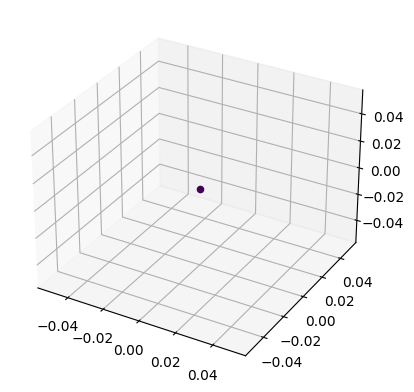

In [ ]:
# Import numpy and other libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define variables
x = np.linspace(0, 1, 1)
y = np.linspace(0, 1, 1)
z = np.linspace(0, 1, 1)

# Define constraints
c1 = x + y + z <= 1
c2 = x + 2*y + 3*z >= 1

# Create an implicit region from the constraints
X, Y, Z = np.meshgrid(x, y, z)
region = (c1 & c2).astype(int)

# Plot the implicit region
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=region, cmap='viridis')
plt.show()


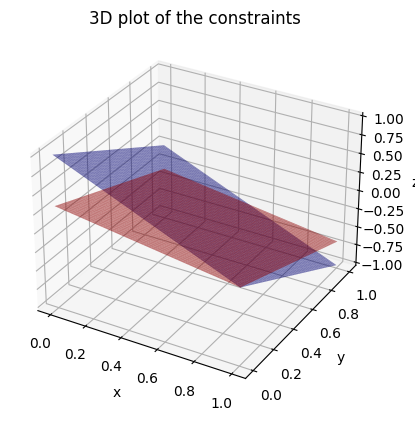

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the variables
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y) # Generate grid

# Define the constraints
Z1 = 1 - X - Y # x + y + z <= 1
Z2 = (1 - X - 2 * Y) / 3 # x + 2y + 3z >= 1

# Plot the constraints as surfaces
ax.plot_surface(X, Y, Z1, color='blue', alpha=0.5)
ax.plot_surface(X, Y, Z2, color='red', alpha=0.5)

# Set the labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D plot of the constraints')

# Show the plot
plt.show()


In [ ]:
import numpy as np


# Define the number of machines and jobs
m = 2
n = 5

# Define the processing times for each job on each machine
p = [[3, 6], # p[i][j] is the processing time of job i on machine j
     [5, 2],
     [1, 2],
     [6, 6],
     [7, 5]]

# Apply Johnson's algorithm to find the optimal sequence of jobs
# Partition the jobs into two sets
N1 = [] # Set of jobs with p[i][0] < p[i][1]
N2 = [] # Set of jobs with p[i][0] >= p[i][1]
for i in range(n):
    if p[i][0] < p[i][1]:
        N1.append(i)
    else:
        N2.append(i)

# Sort the jobs in N1 by increasing order of p[i][0]
N1.sort(key=lambda i: p[i][0])

# Sort the jobs in N2 by decreasing order of p[i][1]
N2.sort(key=lambda i: p[i][1], reverse=True)

# Concatenate the two sets to get the optimal sequence
sequence = N1 + N2

# Calculate the makespan of the optimal sequence
# Initialize the completion times for each machine
c = [0] * m
# Loop through the jobs in the sequence
for i in sequence:
    # Update the completion time for the first machine
    c[0] = c[0] + p[i][0]
    # Update the completion time for the second machine
    c[1] = max(c[0], c[1]) + p[i][1]

# Print the optimal sequence and the minimum makespan
print("Optimal sequence of jobs with Johnson Algorithm is:")
print(sequence)
print("Minimum makespan found with Johnson Algorithm:")
print(c[-1])

print('-----------------------------------------------------')

# Define the fitness function that calculates the makespan of a sequence
def fitness(sequence):
    # Initialize the completion times for each machine
    c = np.zeros(m)
    # Loop through the jobs in the sequence
    for i in sequence:
        # Update the completion time for the first machine
        c[0] = c[0] + p[i][0]
        # Update the completion time for the second machine
        c[1] = max(c[0], c[1]) + p[i][1]
    # Return the makespan as the fitness value
    return c[-1]

# Define the genetic algorithm hyperparameters
pop_size = 20 # Population size
cross_rate = 0.3 # Crossover rate
mut_rate = 0.1 # Mutation rate
max_gen = 20 # Maximum number of generations
min_fit = 10 # Minimum fitness value to stop

# Initialize the population of random sequences
pop = np.array([np.random.permutation(n) for _ in range(pop_size)])

# Initialize the best fitness and sequence
best_fit = np.inf
best_seq = None

# Main loop of the genetic algorithm
for gen in range(max_gen):
    # Evaluate the fitness of each sequence in the population
    fit = np.array([fitness(seq) for seq in pop])
    # Find the best fitness and sequence in the current population
    min_fit_index = np.argmin(fit)
    min_fit_value = fit[min_fit_index]
    min_fit_seq = pop[min_fit_index]
    # Print the current generation and the best fitness and sequence
    print(f"Generation {gen}: Best fitness = {min_fit_value}, Best sequence = {min_fit_seq}")
    # Check if the best fitness is below the minimum fitness
    if min_fit_value < min_fit:
        # Update the best fitness and sequence
        best_fit = min_fit_value
        best_seq = min_fit_seq
        # Stop the algorithm
        break
    # Select the parents based on their fitness
    # Use a simple roulette wheel selection
    fit_sum = np.sum(fit)
    probs = fit_sum / fit # Higher fitness means higher probability
    probs = probs / np.sum(probs) # Normalize the probabilities
    parents = pop[np.random.choice(pop_size, size=pop_size, p=probs)]
    # Apply the crossover operator to create new sequences
    # Use a partially matched crossover (PMX)
    children = []
    for i in range(0, pop_size, 2):
        p1 = parents[i] # First parent
        p2 = parents[i+1] # Second parent
        c1 = p1.copy() # First child
        c2 = p2.copy() # Second child
        # Perform crossover with a given probability
        if np.random.rand() < cross_rate:
            # Choose a random crossover point
            point = np.random.randint(1, n-1)
            # Swap the sub-sequences between the parents
            s1 = p1[point:] # Sub-sequence of the first parent
            s2 = p2[point:] # Sub-sequence of the second parent
            # Find the elements that are in s1 but not in s2, and vice versa
            d1 = np.setdiff1d(s1, s2)
            d2 = np.setdiff1d(s2, s1)
            # Replace the elements in the children with the corresponding elements from the other parent
            for j in range(n):
                if c1[j] in d2:
                    c1[j] = s2[np.where(s1 == c1[j])[0][0]]
                if c2[j] in d1:
                    c2[j] = s1[np.where(s2 == c2[j])[0][0]]
        # Append the children to the list
        children.append(c1)
        children.append(c2)
    # Convert the list of children to an array
    children = np.array(children)
    # Apply the mutation operator to create new sequences
    # Use a swap mutation
    for i in range(pop_size):
        # Perform mutation with a given probability
        if np.random.rand() < mut_rate:
            # Choose two random points
            points = np.random.choice(n, size=2, replace=False)
            # Swap the elements at these points
            children[i][points[0]], children[i][points[1]] = children[i][points[1]], children[i][points[0]]
    # Update the population with the children
    pop = children

# Print the final best fitness and sequence
print(f"Final: Best fitness with GA is  {best_fit}, Best sequence found in GA is  {best_seq}")


Optimal sequence of jobs with Johnson Algorithm is:
[2, 0, 3, 4, 1]
Minimum makespan found with Johnson Algorithm:
24
-----------------------------------------------------
Generation 0: Best fitness = 25.0, Best sequence = [0 3 4 1 2]


IndexError: ignored

In [ ]:
# Import numpy as np
import numpy as np

# Define the number of machines and jobs
m = 2
n = 5

# Define the processing times for each job on each machine
p = [[3, 6], # p[i][j] is the processing time of job i on machine j
     [5, 2],
     [1, 2],
     [6, 6],
     [7, 5]]

# Apply Johnson's algorithm to find the optimal sequence of jobs
# Partition the jobs into two sets
N1 = [] # Set of jobs with p[i][0] < p[i][1]
N2 = [] # Set of jobs with p[i][0] >= p[i][1]
for i in range(n):
    if p[i][0] < p[i][1]:
        N1.append(i)
    else:
        N2.append(i)

# Sort the jobs in N1 by increasing order of p[i][0]
N1.sort(key=lambda i: p[i][0])

# Sort the jobs in N2 by decreasing order of p[i][1]
N2.sort(key=lambda i: p[i][1], reverse=True)

# Concatenate the two sets to get the optimal sequence
sequence = N1 + N2

# Calculate the makespan of the optimal sequence
# Initialize the completion times for each machine
c = [0] * m
# Loop through the jobs in the sequence
for i in sequence:
    # Update the completion time for the first machine
    c[0] = c[0] + p[i][0]
    # Update the completion time for the second machine
    c[1] = max(c[0], c[1]) + p[i][1]

# Print the optimal sequence and the minimum makespan
print("Optimal sequence of jobs with Johnson Algorithm is:")
print(sequence)
print("Minimum makespan found with Johnson Algorithm:")
print(c[-1])

print('-----------------------------------------------------')

# Define the fitness function that calculates the makespan of a sequence
def fitness(sequence):
    # Initialize the completion times for each machine
    c = np.zeros(m)
    # Loop through the jobs in the sequence
    for i in sequence:
        # Update the completion time for the first machine
        c[0] = c[0] + p[i][0]
        # Update the completion time for the second machine
        c[1] = max(c[0], c[1]) + p[i][1]
    # Return the makespan as the fitness value
    return c[-1]

# Define the genetic algorithm hyperparameters
pop_size = 20 # Population size
cross_rate = 0.3 # Crossover rate
mut_rate = 0.1 # Mutation rate
max_gen = 20 # Maximum number of generations
min_fit = 10 # Minimum fitness value to stop

# Initialize the population of random sequences
pop = np.array([np.random.permutation(n) for _ in range(pop_size)])

# Initialize the best fitness and sequence
best_fit = np.inf
best_seq = None

# Main loop of the genetic algorithm
for gen in range(max_gen):
    # Evaluate the fitness of each sequence in the population
    fit = np.array([fitness(seq) for seq in pop])
    # Find the best fitness and sequence in the current population
    min_fit_index = np.argmin(fit)
    min_fit_value = fit[min_fit_index]
    min_fit_seq = pop[min_fit_index]
    # Print the current generation and the best fitness and sequence
    print(f"Generation {gen}: Best fitness = {min_fit_value}, Best sequence = {min_fit_seq}")
    # Check if the best fitness is below the minimum fitness
    if min_fit_value < min_fit:
        # Update the best fitness and sequence
        best_fit = min_fit_value
        best_seq = min_fit_seq
        # Stop the algorithm
        break
    # Select the parents based on their fitness
    # Use a simple roulette wheel selection
    fit_sum = np.sum(fit)
    probs = fit_sum / fit # Higher fitness means higher probability
    probs = probs / np.sum(probs) # Normalize the probabilities
    parents = pop[np.random.choice(pop_size, size=pop_size, p=probs)]
    # Apply the crossover operator to create new sequences
    # Use a partially matched crossover (PMX)
    children = []
    for i in range(0, pop_size, 2):
        p1 = parents[i] # First parent
        p2 = parents[i+1] # Second parent
        c1 = p1.copy() # First child
        c2 = p2.copy() # Second child
        # Perform crossover with a given probability
        if np.random.rand() < cross_rate:
            # Choose a random crossover point
            point = np.random.randint(1, n-1)
            # Swap the sub-sequences between the parents
            c1[point:] = p2[point:]
            c2[point:] = p1[point:]
            # Find the matching positions in the child sequences
            match1 = [j for j in range(point, n) if c1[j] in c1[:point]]
            match2 = [j for j in range(point, n) if c2[j] in c2[:point]]
            # Swap the values in the child sequences that are not in the matching positions
            for j in range(point, n):
                if j in match1:
                    c1[j] = c2[j]
                if j in match2:
                    c2[j] = c1[j]
        # Add the child sequences to the new population
        children.append(c1)
        children.append(c2)
    # Replace the old population with the new population
    pop = np.array(children)
# Add a closing parenthesis


SyntaxError: ignored

In [ ]:
import numpy as np # Added import statement

# Define the number of machines and jobs
m = 2
n = 5

# Define the processing times for each job on each machine
p = [[3, 6], # p[i][j] is the processing time of job i on machine j
     [5, 2],
     [1, 2],
     [6, 6],
     [7, 5]]

# Define the fitness function that calculates the makespan of a sequence
def fitness(sequence):
    # Initialize the completion times for each machine
    c = np.zeros(m)
    # Loop through the jobs in the sequence
    for i in sequence:
        # Update the completion time for the first machine
        c[0] = c[0] + p[i][0]
        # Update the completion time for the second machine
        c[1] = max(c[0], c[1]) + p[i][1]
    # Return the makespan as the fitness value
    return c[-1]

# Define the genetic algorithm hyperparameters
pop_size = 20 # Population size
cross_rate = 0.3 # Crossover rate
mut_rate = 0.1 # Mutation rate
max_gen = 20 # Maximum number of generations
min_fit = 10 # Minimum fitness value to stop

# Initialize the population of random sequences
pop = np.array([np.random.permutation(n) for _ in range(pop_size)])

# Initialize the best fitness and sequence
best_fit = np.inf
best_seq = None

# Main loop of the genetic algorithm
for gen in range(max_gen):
    # Evaluate the fitness of each sequence in the population
    fit = np.array([fitness(seq) for seq in pop])
    # Find the best fitness and sequence in the current population
    min_fit_index = np.argmin(fit)
    min_fit_value = fit[min_fit_index]
    min_fit_seq = pop[min_fit_index]
    # Print the current generation and the best fitness and sequence
    print(f"Generation {gen}: Best fitness = {min_fit_value}, Best sequence = {min_fit_seq}")
    # Check if the best fitness is below the minimum fitness
    if min_fit_value < min_fit:
        # Update the best fitness and sequence
        best_fit = min_fit_value
        best_seq = min_fit_seq
        # Stop the algorithm
        break
    # Select the parents based on their fitness
    # Use a simple roulette wheel selection
    fit_sum = np.sum(fit)
    probs = fit_sum / fit # Higher fitness means higher probability
    probs = probs / np.sum(probs) # Normalize the probabilities
    parents = pop[np.random.choice(pop_size, size=pop_size, p=probs)]
    # Apply the crossover operator to create new sequences
    # Use a partially matched crossover (PMX)
    children = []
    for i in range(0, pop_size, 2):
        p1 = parents[i] # First parent
        p2 = parents[i+1] # Second parent
        c1 = p1.copy() # First child
        c2 = p2.copy() # Second child
        # Perform crossover with a given probability
        if np.random.rand() < cross_rate:
            # Choose a random crossover point
            point = np.random.randint(1, n-1)
            # Swap the sub-sequences between the parents
            s1 = p1[point:] # Sub-sequence of the first parent
            s2 = p2[point:] # Sub-sequence of the second parent
            # Find the elements that are in s1 but not in s2, and vice versa
            d1 = np.setdiff1d(s1, s2)
            d2 = np.setdiff1d(s2, s1)
            # Replace the elements in the children with the corresponding elements from the other parent
            for j in range(n):
                if c1[j] in d2:
                    c1[j] = s2[np.where(s1 == c1[j])[0][0]]
                if c2[j] in d1:
                    c2[j] = s1[np.where(s2 == c2[j])[0][0]]
        # Append the children to the list
        children.append(c1)
        children.append(c2)
    # Convert the list of children to an array
    children = np.array(children)
    # Apply the mutation operator to create new sequences
    # Use a swap mutation
    for i in range(pop_size):
        # Perform mutation with a given probability
        if np.random.rand() < mut_rate:
            # Choose two random points
            points = np.random.choice(n, size=2, replace=False)
            # Swap the elements at these points
            children[i][points[0]], children[i][points[1]] = children[i][points[1]], children[i][points[0]] # Added swap statement
    # Update the population with the children
    pop = children # Added update statement

# Print the final best fitness and sequence
print(f"Final: Best fitness with GA is  {best_fit}, Best sequence found in GA is  {best_seq}")

Generation 0: Best fitness = 25.0, Best sequence = [0 4 2 3 1]
Generation 1: Best fitness = 25.0, Best sequence = [0 4 2 3 1]


IndexError: ignored